In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
df = pd.read_csv('/Users/Chris/Desktop/introml/unit02_mult_lin_reg/exp1.csv',
                 names=names,index_col=0)

In [3]:
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


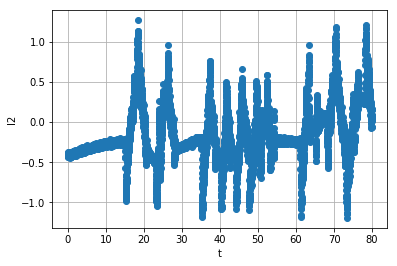

In [4]:
df.reset_index(drop=False,inplace=True,col_level=0)
t=np.array(df['t'])
y=np.array(df['I2'])
plt.plot(t,y,'o')
plt.xlabel('t')
plt.ylabel('I2')
plt.grid(True)
#df.plot(use_index=True,x='t',y='I2',kind='line',grid=True,)

In [5]:
ytrain=y
xtrain=pd.read_csv('/Users/Chris/Desktop/introml/unit02_mult_lin_reg/exp1.csv',
names=['q3','dq2','eps21','eps22','eps31','eps32','ddq2'])

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

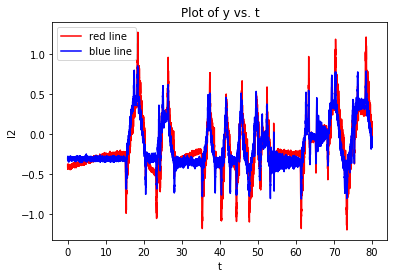

In [7]:
ytrain_pred = regr.predict(xtrain)
#RSS_tr = np.mean((ytrain_pred-ytrain)**2)/(np.std(ytrain)**2)
#Rsq_tr = 1-RSS_tr

plot1,=plt.plot(t,ytrain,'r')
plot2,=plt.plot(t,ytrain_pred,'b')
plt.xlabel('t')
plt.ylabel('I2')
plt.title('Plot of y vs. t')
plt.legend([plot1, plot2], ('red line','blue line'),numpoints=1)# make legend
plt.show()# show the plot on the screen

In [8]:
RSS_tr = np.mean((ytrain_pred-ytrain)**2)/(np.std(ytrain)**2)
print("RSS per sample = {0:f}".format(RSS_tr))

RSS per sample = 0.232673


In [9]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
df = pd.read_csv('/Users/Chris/Desktop/introml/unit02_mult_lin_reg/exp2.csv',
                 names=names)
t=np.array(df['t'])
y_test=np.array(df['I2'])
x_test=pd.read_csv('/Users/Chris/Desktop/introml/unit02_mult_lin_reg/exp2.csv',
names=['q3','dq2','eps21','eps22','eps31','eps32','ddq2'])

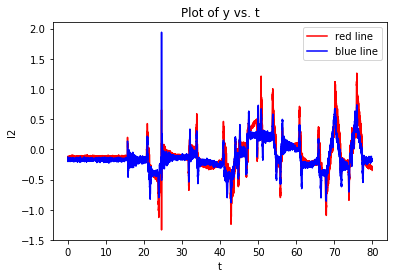

In [10]:
y_test_pred = regr.predict(x_test)
plot1,=plt.plot(t,y_test,'r')
plot2,=plt.plot(t,y_test_pred,'b')
plt.xlabel('t')
plt.ylabel('I2')
plt.title('Plot of y vs. t')
plt.legend([plot1, plot2], ('red line','blue line'),numpoints=1)# make legend
plt.show()# show the plot on the screen

In [11]:
RSS_test = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 0.249818
R^2 =            0.750182


In [12]:
'It is substantially higher than the training data'

'It is substantially higher than the training data'